# HW 2: REGRESSION

HW here: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md

In [1]:
import pandas as pd


df = pd.read_csv('./housing.csv')

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Objective: Create a regression model for predicting housing prices (column 'median_house_value').

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'


In [6]:
cols = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]


df_filtered = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])][cols]

In [10]:
df_filtered.head(10) 

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
862,37.58,-121.99,31.0,2878.0,478.0,1276.0,485.0,6.2073,282500.0
863,37.58,-122.00,6.0,4405.0,717.0,2071.0,688.0,5.8151,295600.0
870,37.49,-121.93,5.0,1150.0,311.0,648.0,245.0,3.5714,300000.0
880,37.56,-121.99,18.0,5505.0,1005.0,2641.0,971.0,5.0000,269700.0
881,37.56,-121.99,20.0,6462.0,1294.0,3288.0,1235.0,4.3393,231200.0


In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## 0. Does the median_house_value have a long tail?

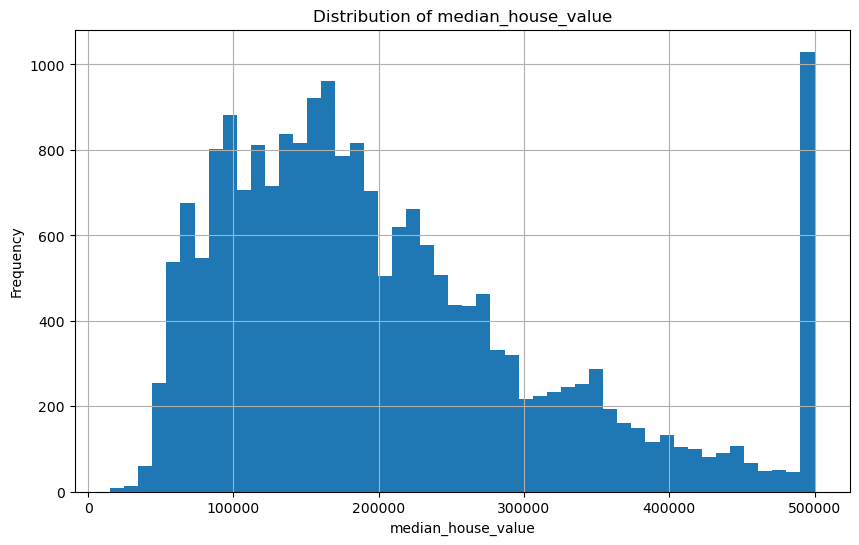

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've read your dataset into a DataFrame named df
plt.figure(figsize=(10,6))
df['median_house_value'].hist(bins=50)
plt.title('Distribution of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()


#### 1. Which columns are missing data?

In [13]:
missing_data_columns = df.columns[df.isna().any()].tolist()

print(missing_data_columns)

['total_bedrooms']


#### 2. 